In [40]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
from skimage import io

In [41]:
image_file = 'image_man/Original.jpg'
input_image = io.imread(image_file)  
[nx, ny, nz] = np.shape(input_image) 

In [42]:
r_img, g_img, b_img = input_image[:, :, 0], input_image[:, :, 1], input_image[:, :, 2]

In [43]:
gamma = 1.400  # a parameter
r_const, g_const, b_const = 0.2126, 0.7152, 0.0722  # weights for the RGB components respectively
grayscale_image = r_const * r_img ** gamma + g_const * g_img ** gamma + b_const * b_img ** gamma

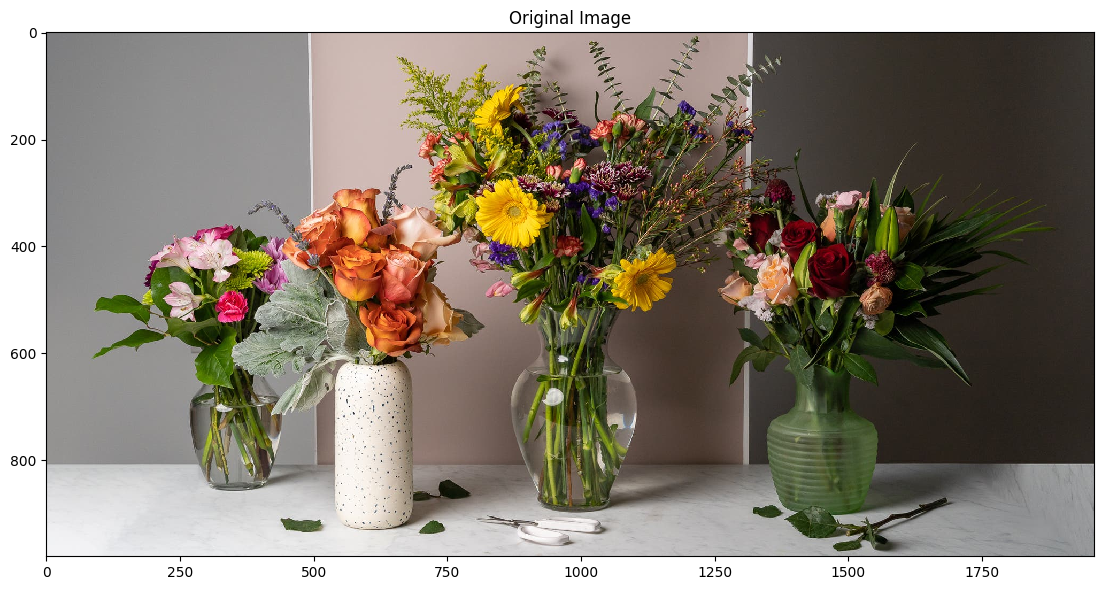

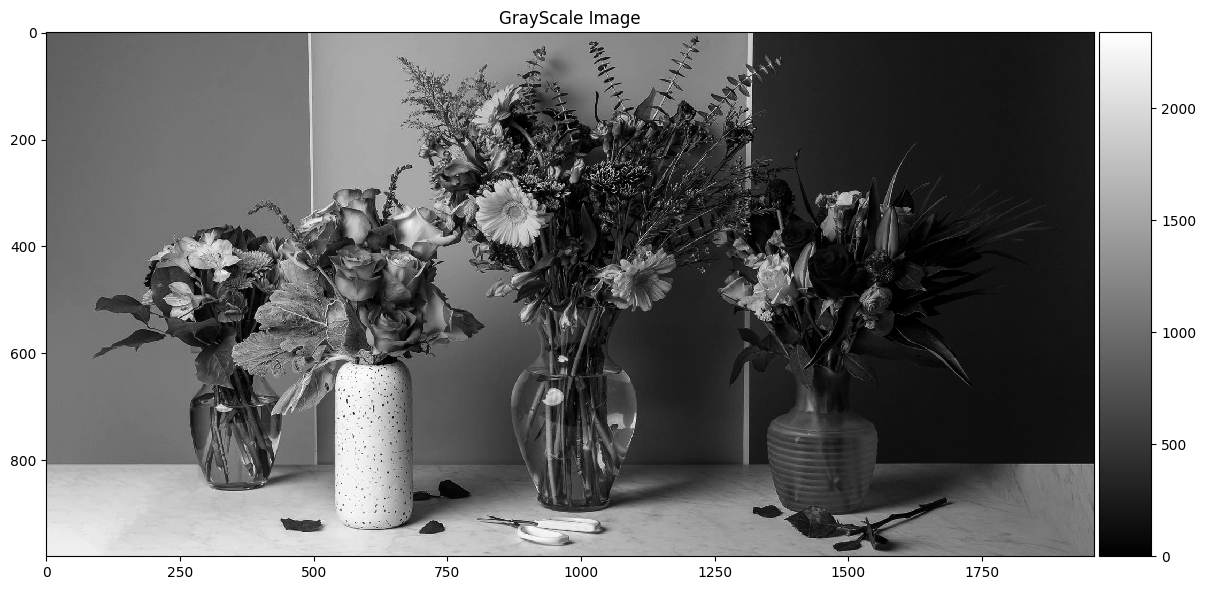

In [44]:
plt.figure(figsize=(15,6)) 
plt.title("Original Image")
io.imshow(input_image)

plt.figure(figsize=(15,6)) 
plt.title("GrayScale Image")
io.imshow(grayscale_image, cmap=plt.get_cmap('gray'))

In [45]:
Gx = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])
Gy = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])
[rows, columns] = np.shape(grayscale_image)
sobel_filtered_image = np.zeros(shape=(rows, columns))

In [46]:
for i in range(rows - 2):
    for j in range(columns - 2):
        gx = np.sum(np.multiply(Gx, grayscale_image[i:i + 3, j:j + 3]))  # x direction
        gy = np.sum(np.multiply(Gy, grayscale_image[i:i + 3, j:j + 3]))  # y direction
        sobel_filtered_image[i + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2)  # calculate the "hypotenuse"

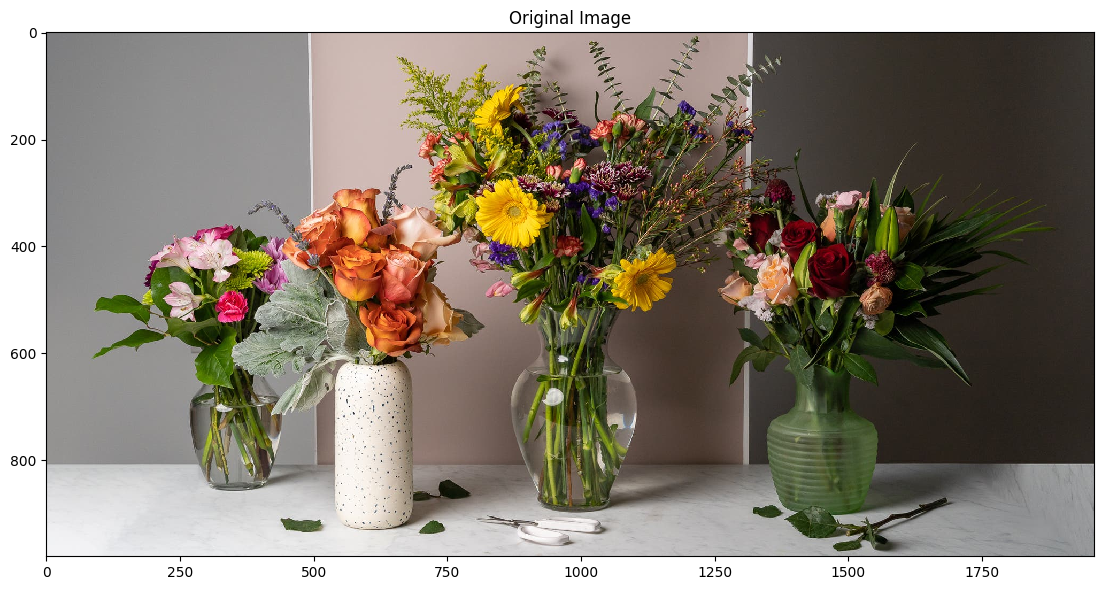

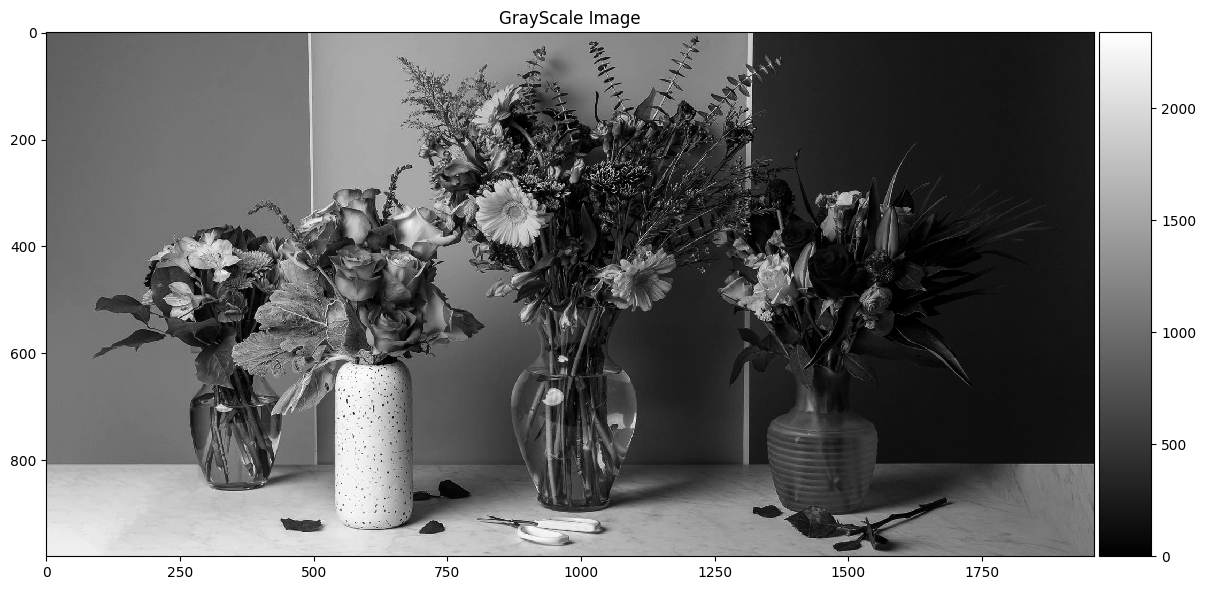

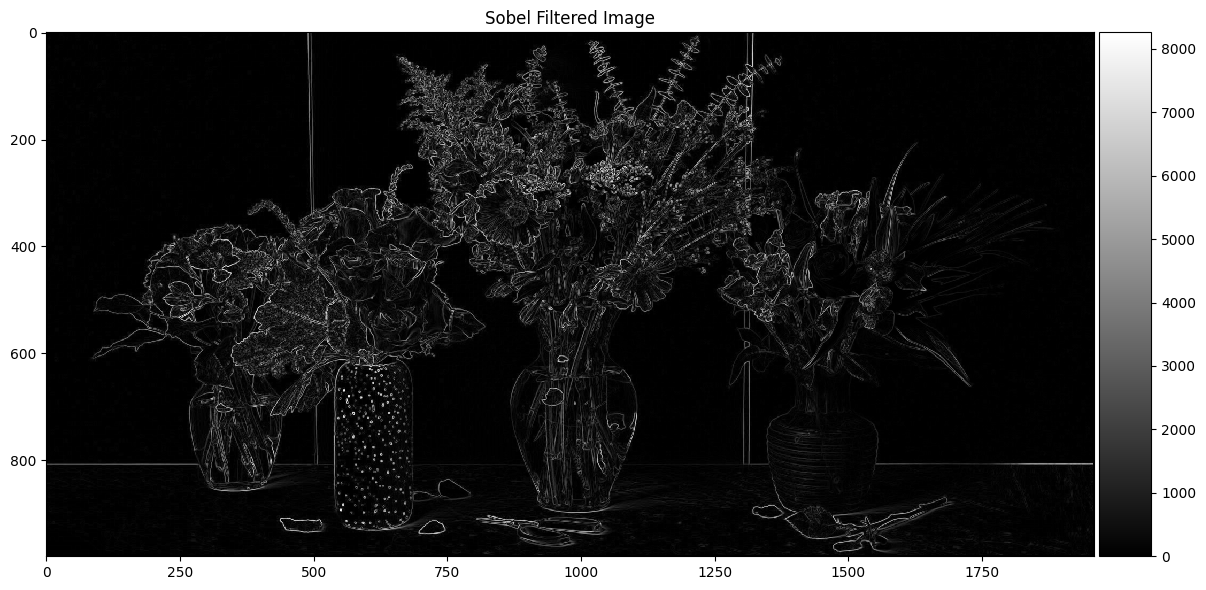

In [47]:
plt.figure(figsize=(15,6)) 
plt.title("Original Image")
io.imshow(input_image)

plt.figure(figsize=(15,6)) 
plt.title("GrayScale Image")
io.imshow(grayscale_image, cmap=plt.get_cmap('gray'))


plt.figure(figsize=(15,6)) 
plt.title("Sobel Filtered Image")
io.imshow(sobel_filtered_image, cmap=plt.get_cmap('gray'))

In [48]:
plt.imsave('sobel_filtered_image.png', sobel_filtered_image, cmap=plt.get_cmap('gray'))